In [132]:
#DATA PREPROCESSING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [53]:
dt = pd.read_csv(r'C:\Users\NANDHINI SIVAKUMAR\Downloads\cancer_dt.csv',index_col = 0)
dt.head()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_breath,wheezing,swallowing_difficulty,clubbing_nails,frequent_cold,dry_cough,snoring,level
id,,,,,,,,,,,,,,,,,,,,,
P1,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
P10,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
P100,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
P1000,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
P101,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [54]:
dt.isnull().sum()

age                      0
gender                   0
air_pollution            0
alcohol_use              0
dust_allergy             0
occupational_hazards     0
genetic_risk             0
chronic_lung_disease     0
balanced_diet            0
obesity                  0
smoking                  0
passive_smoker           0
chest_pain               0
coughing_blood           0
fatigue                  0
weight_loss              0
shortness_breath         0
wheezing                 0
swallowing_difficulty    0
clubbing_nails           0
frequent_cold            0
dry_cough                0
snoring                  0
level                    0
dtype: int64

In [55]:
dt['level']= dt["level"].replace("Low", "0")
dt['level']= dt["level"].replace("Medium", "1")
dt['level']= dt["level"].replace("High", "2")

In [151]:
x=dt.iloc[:,:-1].values
y=dt.iloc[:,-1].values

In [58]:
#EXPLORATORY DATA ANALYSIS
#VISUALIZING LEVEL VARIABLE
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [59]:
level_level = dt.groupby('level').agg('count')
#print(level_level)

In [60]:
type_labels = level_level.age.sort_values().index 
type_counts = level_level.age.sort_values()

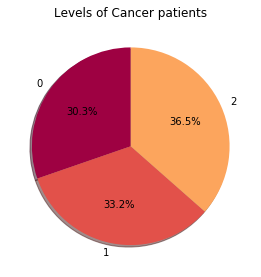

In [61]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
lg = plt.subplot(the_grid[0, 1], aspect=1, title='Levels of Cancer patients')
label_ids = plt.pie(type_counts, labels=type_labels, startangle = 90,autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

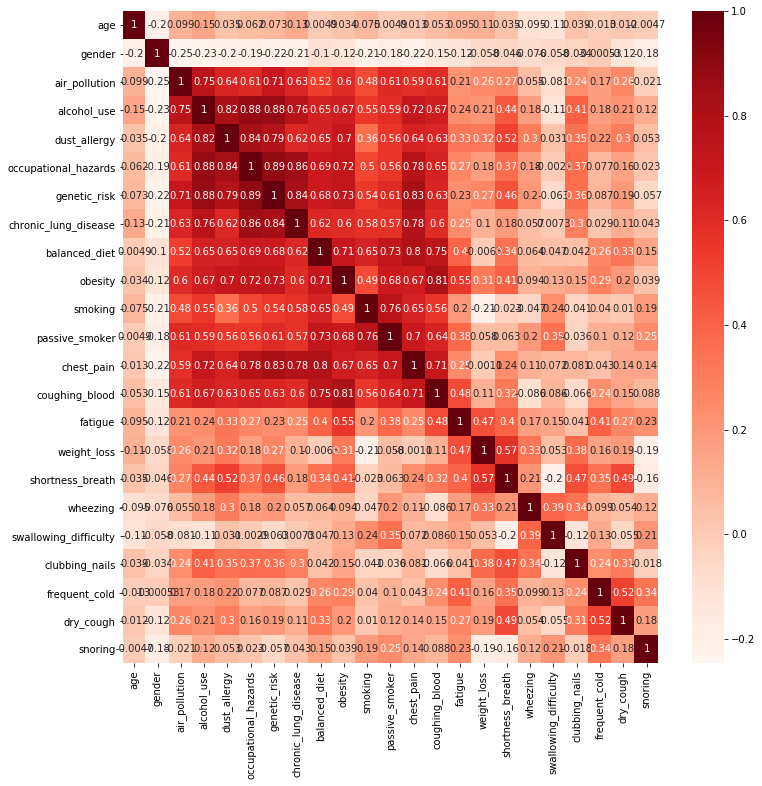

In [62]:
#FEATURE SELECTION USING FILTER METHOD
#Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables 
#with the output variable. We will only select features which has correlation of above 0.5 (taking absolute value) 
#with the output variable.
#value lies between 0 to 1. 0-no correlation, 1-strong +ve correlation, -1 -strong -ve correlation
#Using Pearson Correlation
plt.figure(figsize=(12,12))
cor = dt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
#FEATURE SELECTION USING EMBEDDED METHOD
x=dt.drop("level",1)
y=dt["level"]
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.001547
Best score using built-in LassoCV: 0.927478


In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

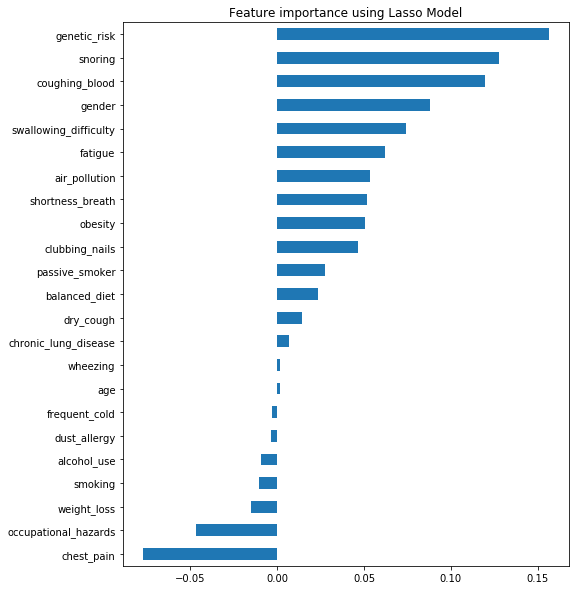

In [65]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp = imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [66]:
#Correlation with output variable
#cor_target = abs(cor["label"])
#Selecting highly correlated features
corr_matrix = dt.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
# Drop features 
dt.drop(dt[to_drop], axis=1)

,age,gender,air_pollution,weight_loss,wheezing,swallowing_difficulty,clubbing_nails,frequent_cold,snoring,level
id,,,,,,,,,,
P1,33,1,2,4,2,3,1,2,4,0
P10,17,1,3,3,8,6,2,1,2,1
P100,35,1,4,7,2,1,4,6,2,2
P1000,37,1,7,2,1,4,5,6,5,2
P101,46,1,6,2,1,4,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...
P995,44,1,6,3,7,8,2,4,3,2
P996,37,2,6,6,7,2,4,3,4,2
P997,25,2,4,7,2,1,4,6,2,2


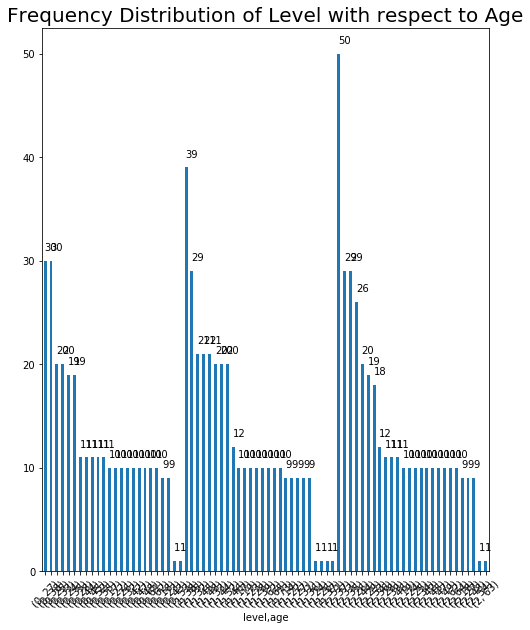

In [67]:
#Age vs Level
ax = dt['age'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Age', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

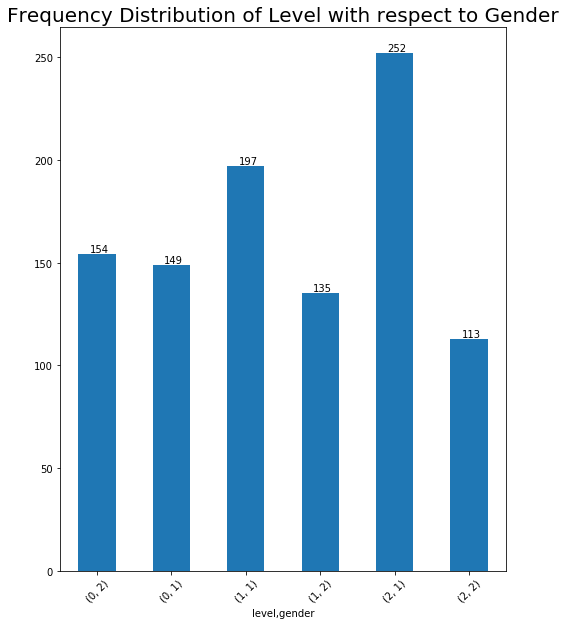

In [68]:
#Gender vs Level
ax = dt['gender'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Gender', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

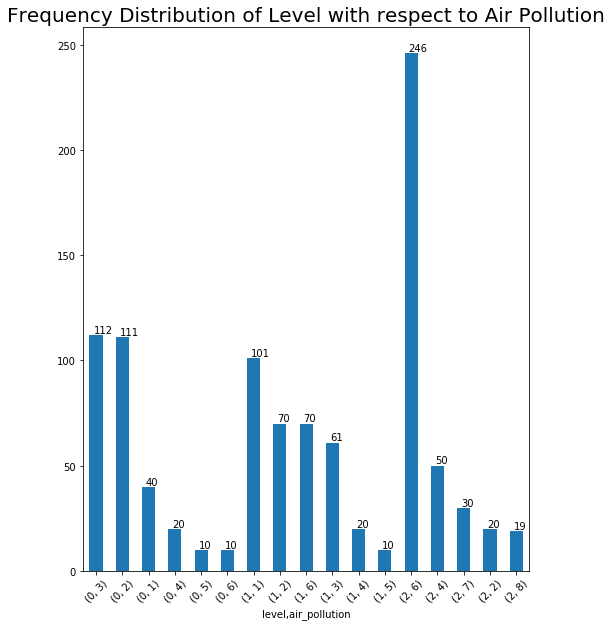

In [69]:
#Air pollution vs Level
ax = dt['air_pollution'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Air Pollution', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

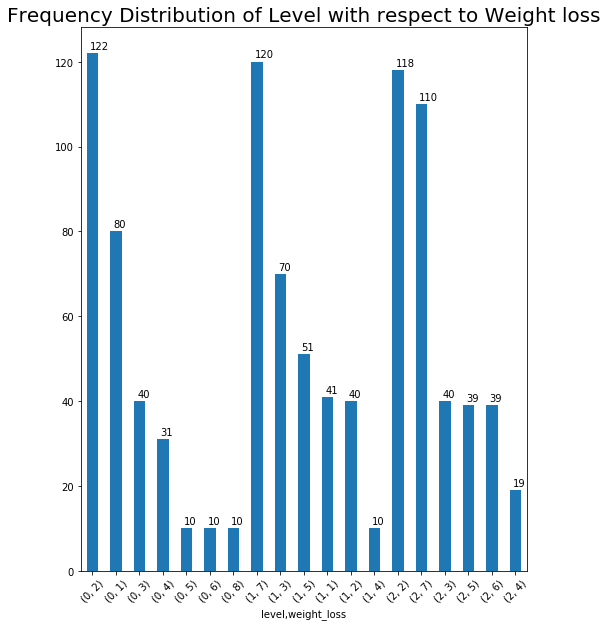

In [70]:
#Weight Loss vs Level
ax = dt['weight_loss'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Weight loss', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

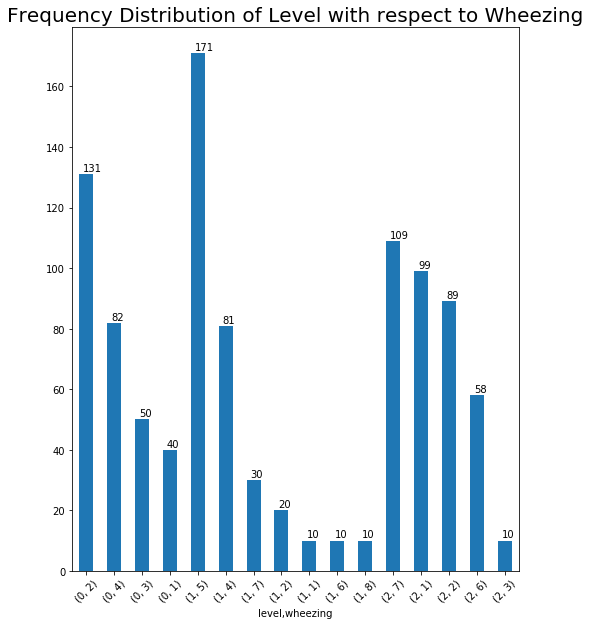

In [71]:
#Wheezing vs Level
ax = dt['wheezing'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Wheezing', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

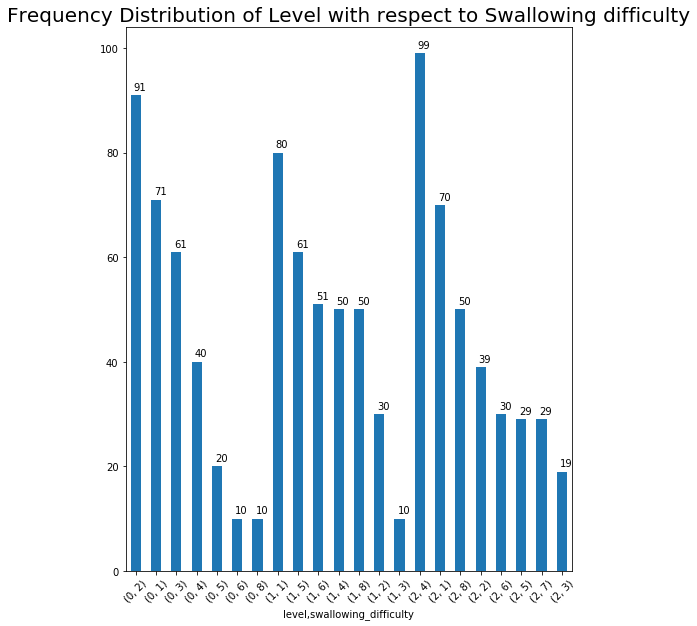

In [72]:
#Swallowing difficulty vs Level
ax = dt['swallowing_difficulty'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Swallowing difficulty', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

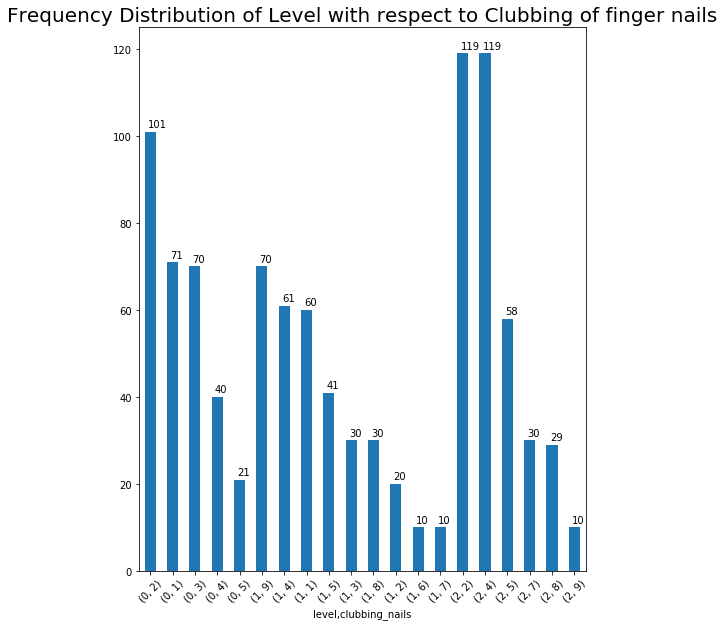

In [73]:
#Clubbing of finger nails vs Level
ax = dt['clubbing_nails'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Clubbing of finger nails', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

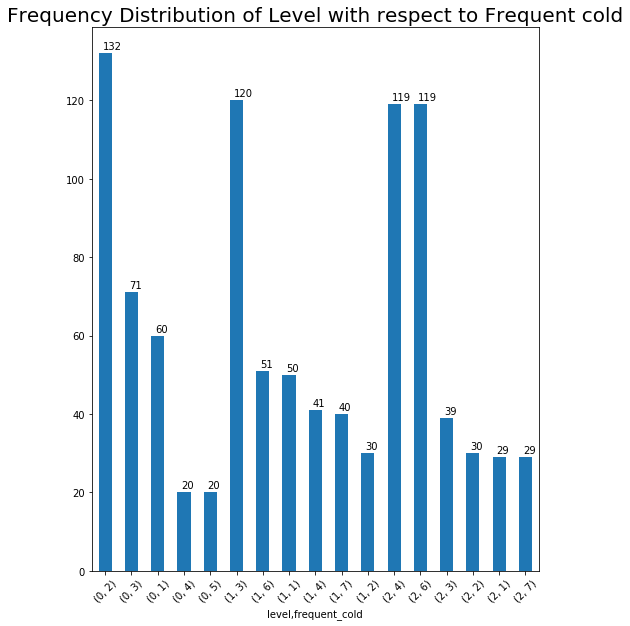

In [74]:
#Frequent cold vs Level
ax = dt['frequent_cold'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Frequent cold', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

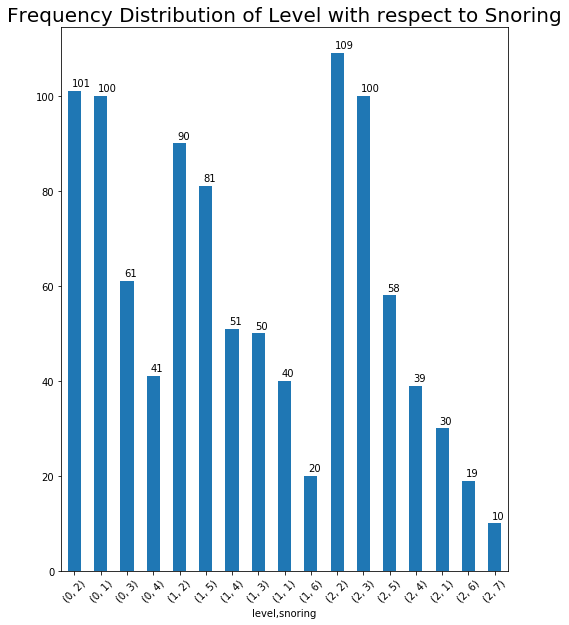

In [75]:
#Snoring vs Level
ax = dt['snoring'].groupby(dt['level']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Level with respect to Snoring', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [76]:
from sklearn.preprocessing import MinMaxScaler
minmaxer = MinMaxScaler(feature_range=(1,10))
minmaxed_x = minmaxer.fit_transform(x)
from sklearn.feature_selection import chi2
chi_value,pval = chi2(minmaxed_x,y)
pval = np.round(pval,decimals=3)
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(np.concatenate((chi_value.reshape(-1,1),pval.reshape(-1,1)),axis=1),index = dt.columns[:-1],columns=['chi2 val','pval']))

                          chi2 val   pval
age                       8.428259  0.015
gender                  114.795610  0.000
air_pollution           707.770937  0.000
alcohol_use            1056.778732  0.000
dust_allergy            538.805919  0.000
occupational_hazards    560.172570  0.000
genetic_risk            790.507916  0.000
chronic_lung_disease    490.957846  0.000
balanced_diet           954.225646  0.000
obesity                1154.305716  0.000
smoking                 914.178983  0.000
passive_smoker         1022.242533  0.000
chest_pain              605.202750  0.000
coughing_blood          942.555991  0.000
fatigue                 601.083291  0.000
weight_loss             281.968268  0.000
shortness_breath        382.258042  0.000
wheezing                275.166104  0.000
swallowing_difficulty   154.549443  0.000
clubbing_nails          298.603484  0.000
frequent_cold           319.156291  0.000
dry_cough               249.641472  0.000
snoring                 155.316014

In [77]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
level_encoded=le.fit_transform(dt.level)
lae = level_encoded
print(lae)
dt.drop('level', axis=1)
lae = pd.DataFrame(lae)
dt = pd.concat([dt,lae],axis=1)

[0 1 2 2 2 2 0 0 1 1 2 2 1 2 0 1 1 2 2 1 2 2 2 2 2 1 1 1 2 1 2 2 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 0 1 2 2 2 0 0 1 1 2 2 1 2 0 1 1 2 2 1 2 2 2 2 1 1 1 1 2 1 2 2 1 0 0 2 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 1 0 2 2 2 0 0 1 1 2 2 1 0 0 1 1 2 2 1 2 2 2 2 0 1 1 1 2 1 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 1 0 2 2 2 0 0 1 1 2 2 1 0 0 1 1 2 2 1 2 2 2 2 0 1 1 1 2 1 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 0 0 1 1 2 2 1 0 0 1 1 2 2 1 2 2 2 2 0 1 1 1 2 1 2 2 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

In [121]:
from sklearn.model_selection import cross_val_score
scores = []
models = []

# utility function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, x_train, y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean of scores:', np.mean( cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 9))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

Cross validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of scores: 1.0
Variance: 0.0


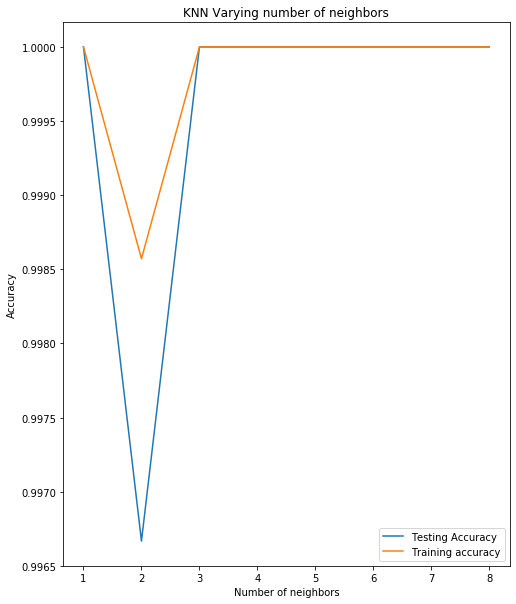

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix [[ 91   0   0]
 [  0 100   0]
 [  0   0 109]]
Training Accuracy 100.0
Testing Accuracy 100.0
The accuracy score achieved using KNN Model is: 100.0 %


In [123]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)
print_scores(knn, x_train, y_train, 10, 'accuracy')
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print('Classification Report', classification_report(y_test, y_pred_knn))
print('Confusion Matrix', confusion_matrix(y_test, y_pred_knn))
print("Training Accuracy", knn.score(x_train, y_train)*100)
print("Testing Accuracy", knn.score(x_test, y_test)*100)

score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN Model is: "+str(score_knn)+" %")


In [126]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [127]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,91,0,0,91
1,0,100,0,100
2,0,0,109,109
All,91,100,109,300


In [129]:
#NBC CLASSIFIER
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
print_scores(nb, x_train, y_train, 10, 'accuracy')

nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

print('Classification Report', classification_report(y_test, y_pred_nb))
print('Confusion Matrix', confusion_matrix(y_test, y_pred_nb))
print("Training Accuracy", nb.score(x_train, y_train)*100)
print("Testing Accuracy", nb.score(x_test, y_test)*100)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes Model is: "+str(score_nb)+" %")

Cross validation scores: [0.84285714 0.87142857 0.85714286 0.88571429 0.81428571 0.94285714
 0.88571429 0.95714286 0.92857143 0.87142857]
Mean of scores: 0.8857142857142858
Variance: 0.04285714285714287
Classification Report               precision    recall  f1-score   support

           0       1.00      0.90      0.95        91
           1       0.87      0.82      0.85       100
           2       0.85      0.97      0.91       109

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Confusion Matrix [[ 82   9   0]
 [  0  82  18]
 [  0   3 106]]
Training Accuracy 88.57142857142857
Testing Accuracy 90.0
The accuracy score achieved using Naive Bayes Model is: 90.0 %


In [168]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [177]:
from sklearn.ensemble import RandomForestClassifier as RTC
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [176]:
dtc = DTC()
dtc.fit(x_train,y_train)
#MODEL PERFORMANCE EVALUATION
from sklearn.metrics import classification_report,confusion_matrix
x_test = np.nan_to_num(x_test)
y_pred = dtc.predict(x_test)
print(classification_report(y_test,y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",(conf_mat))
print("Accuracy : ",(conf_mat[0][0]+conf_mat[1][1])/len(y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:  [[ 91   0   0]
 [  0 100   0]
 [  0   0 109]]
Accuracy :  0.6366666666666667


[Text(145.47857142857143, 203.85, 'X[5] <= 5.0\ngini = 0.664\nsamples = 433\nvalue = [218, 217, 265]'),
 Text(31.885714285714286, 176.67000000000002, 'X[13] <= 2.5\ngini = 0.47\nsamples = 193\nvalue = [195, 106, 4]'),
 Text(15.942857142857143, 149.49, 'gini = 0.0\nsamples = 63\nvalue = [104, 0, 0]'),
 Text(47.82857142857143, 149.49, 'X[18] <= 5.0\ngini = 0.517\nsamples = 130\nvalue = [91, 106, 4]'),
 Text(31.885714285714286, 122.31, 'gini = 0.0\nsamples = 50\nvalue = [82, 0, 0]'),
 Text(63.77142857142857, 122.31, 'X[8] <= 5.667\ngini = 0.2\nsamples = 80\nvalue = [9, 106, 4]'),
 Text(47.82857142857143, 95.13, 'X[11] <= 1.571\ngini = 0.144\nsamples = 76\nvalue = [9, 106, 0]'),
 Text(31.885714285714286, 67.94999999999999, 'gini = 0.0\nsamples = 4\nvalue = [5, 0, 0]'),
 Text(63.77142857142857, 67.94999999999999, 'X[22] <= 3.0\ngini = 0.07\nsamples = 72\nvalue = [4, 106, 0]'),
 Text(47.82857142857143, 40.77000000000001, 'X[19] <= 1.5\ngini = 0.444\nsamples = 9\nvalue = [4, 8, 0]'),
 Text(31

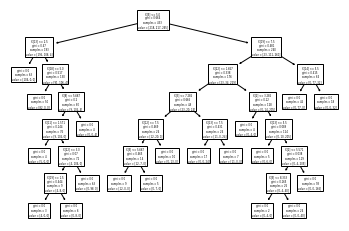

In [183]:
#VISUALIZATION
from os import system
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=690)

# Train
model.fit(x_train, y_train.ravel())
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
from sklearn import tree
# Export as dot file
dotfile = open("C:/Users/NANDHINI SIVAKUMAR/Downloads/treedf.dot", 'w')
export_graphviz(estimator, out_file="C:/Users/NANDHINI SIVAKUMAR/Downloads/treedf.dot")
dotfile.close()
system("dot -Tpng C:/Users/NANDHINI SIVAKUMAR/Downloads/treedf.dot -o C:/Users/NANDHINI SIVAKUMAR/Downloads/treedf.png")
from graphviz import Source
from IPython.display import SVG
tree.export_graphviz(estimator, out_file="C:/Users/NANDHINI SIVAKUMAR/Downloads/treedf.dot", feature_names=None)
system('C:/Users/NANDHINI SIVAKUMAR/anaconda3/Lib/site-packages/graphviz/')
tree.plot_tree(estimator,feature_names = None)

In [179]:
rtc = RTC()
rtc.fit(x_train,y_train)
#MODEL PERFORMANCE EVALUATION
from sklearn.metrics import classification_report,confusion_matrix
x_test = np.nan_to_num(x_test)
y_pred = rtc.predict(x_test)
print(classification_report(y_test,y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",(conf_mat))
print("Accuracy : ",(conf_mat[0][0]+conf_mat[1][1])/len(y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:  [[ 91   0   0]
 [  0 100   0]
 [  0   0 109]]
Accuracy :  0.6366666666666667


[Text(201.86470588235295, 201.90857142857143, 'X[13] <= 5.5\ngini = 0.664\nsamples = 435\nvalue = [209, 236, 255]'),
 Text(128.01176470588237, 170.84571428571428, 'X[17] <= 5.0\ngini = 0.512\nsamples = 244\nvalue = [199, 202, 5]'),
 Text(108.31764705882354, 139.78285714285715, 'X[14] <= 3.5\ngini = 0.265\nsamples = 140\nvalue = [199, 31, 5]'),
 Text(39.38823529411765, 108.72, 'X[11] <= 6.143\ngini = 0.052\nsamples = 113\nvalue = [183, 5, 0]'),
 Text(19.694117647058825, 77.65714285714284, 'gini = 0.0\nsamples = 104\nvalue = [176, 0, 0]'),
 Text(59.082352941176474, 77.65714285714284, 'X[4] <= 4.429\ngini = 0.486\nsamples = 9\nvalue = [7, 5, 0]'),
 Text(39.38823529411765, 46.59428571428572, 'gini = 0.0\nsamples = 6\nvalue = [7, 0, 0]'),
 Text(78.7764705882353, 46.59428571428572, 'gini = 0.0\nsamples = 3\nvalue = [0, 5, 0]'),
 Text(177.24705882352941, 108.72, 'X[18] <= 3.857\ngini = 0.567\nsamples = 27\nvalue = [16, 26, 5]'),
 Text(137.85882352941178, 77.65714285714284, 'X[3] <= 5.0\ngini 

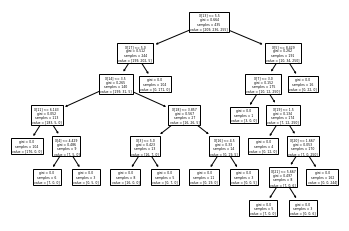

In [182]:
#VISUALIZATION
from os import system
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=690)

# Train
model.fit(x_train, y_train.ravel())
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
from sklearn import tree
# Export as dot file
dotfile = open("C:/Users/NANDHINI SIVAKUMAR/Downloads/treerf.dot", 'w')
export_graphviz(estimator, out_file="C:/Users/NANDHINI SIVAKUMAR/Downloads/treerf.dot")
dotfile.close()
system("dot -Tpng C:/Users/NANDHINI SIVAKUMAR/Downloads/treerf.dot -o C:/Users/NANDHINI SIVAKUMAR/Downloads/treerf.png")
from graphviz import Source
from IPython.display import SVG
tree.export_graphviz(estimator, out_file="C:/Users/NANDHINI SIVAKUMAR/Downloads/treerf.dot", feature_names=None)
system('C:/Users/NANDHINI SIVAKUMAR/anaconda3/Lib/site-packages/graphviz/')
tree.plot_tree(estimator,feature_names = None)